<a href="https://colab.research.google.com/github/AlanDiego-py/AlanDiego/blob/main/Estat%C3%ADstica_b%C3%A1sica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Fonte dos dados: https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

In [39]:
import pandas as pd

In [40]:
dados = pd.read_csv('dados.csv')

In [41]:
dados.head(10)

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631
5,11,1,34,8,12,790,1.637906
6,11,0,57,8,12,3150,1.570078
7,11,1,60,8,12,1700,1.608495
8,11,1,50,4,14,1800,1.780329
9,11,0,26,8,12,1150,1.793203


In [42]:
#QUANTITATIVA DISCRETA - quando representa anos completos (números inteiros);
print('De %s até %s anos' % (dados.Idade.min(), dados.Idade.max()))

De 13 até 99 anos


In [43]:
#QUANTITATIVA CONTÍNUA - quando representa a idade exata, sendo representado por frações de anos;
print('De %s até %s metros' % (dados['Altura'].min(), dados.Altura.max()))

De 1.339244614 até 2.028496765 metros


In [44]:
#Distribuição de frequências para variáveis qualitativas
sexo = {0: 'Masculino', 
        1: 'Feminino'}

cor = {0: 'Indígena', 
       2: 'Branca', 
       4: 'Preta', 
       6: 'Amarela', 
       8: 'Parda', 
       9: 'Sem declaração'}

In [45]:
frequencia = pd.crosstab(dados.Sexo,
                         dados.Cor)
frequencia.rename(index = sexo, inplace = True)
frequencia.rename(columns = cor, inplace = True)
frequencia

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [46]:
percentual = pd.crosstab(dados.Sexo,
                         dados.Cor,
                         normalize = True) * 100
percentual.rename(index = sexo, inplace = True)
percentual.rename(columns = cor, inplace = True)
percentual

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.333160,28.883394,7.160333,0.305830,32.617126
Feminino,0.131442,12.520822,3.759761,0.152264,14.135867


In [47]:
percentual = pd.crosstab(dados.Sexo,
                         dados.Cor,
                         aggfunc = 'mean',
                         values = dados.Renda)
percentual.rename(index = sexo, inplace = True)
percentual.rename(columns = cor, inplace = True)
percentual

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,1081.710938,2925.744435,1603.861687,4758.251064,1659.577425
Feminino,2464.386139,2109.866750,1134.596400,3027.341880,1176.758516


In [48]:
#Distribuição de frequências para variáveis quantitativas (classes personalizadas)
dados.Renda.min()

0

In [49]:
dados.Renda.max()

200000

In [50]:
classes = [0, 1576, 3152, 7880, 15760, 200000]

In [51]:
labels = ['E', 'D', 'C', 'B', 'A']

In [52]:
frequencia = pd.value_counts(
  pd.cut(x = dados.Renda,
         bins = classes,
         labels = labels,
         include_lowest = True)
)
frequencia

E    49755
D    16700
C     7599
B     2178
A      608
Name: Renda, dtype: int64

In [53]:
percentual = pd.value_counts(
  pd.cut(x = dados.Renda,
         bins = classes,
         labels = labels,
         include_lowest = True),
  normalize = True
)
percentual

E    0.647514
D    0.217335
C    0.098894
B    0.028345
A    0.007913
Name: Renda, dtype: float64

In [54]:
dist_freq_quantitativas_personalizadas = pd.DataFrame(
    {'Frequência': frequencia, 'Porcentagem (%)': percentual}
)
dist_freq_quantitativas_personalizadas

,Frequência,Porcentagem (%)
E,49755,0.647514
D,16700,0.217335
C,7599,0.098894
B,2178,0.028345
A,608,0.007913


In [55]:
dist_freq_quantitativas_personalizadas.sort_index(ascending = False)

,Frequência,Porcentagem (%)
A,608,0.007913
B,2178,0.028345
C,7599,0.098894
D,16700,0.217335
E,49755,0.647514


###HISTOGRAMA

In [56]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


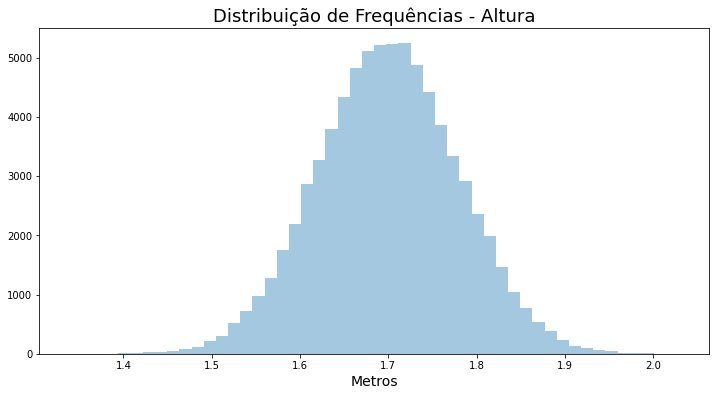

In [57]:
ax = sns.distplot(dados.Altura, kde = False)

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências - Altura', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)
ax

In [58]:
#MEDIDAS DE TENDÊNCIA CENTRAL
Media = dados.Renda.mean()
Media

2000.3831988547631

In [59]:
Mediana = dados.Renda.median()
Mediana

1200.0

In [60]:
Moda = dados.Renda.mode()[0]
Moda

788

In [61]:
Moda < Mediana < Media

True

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


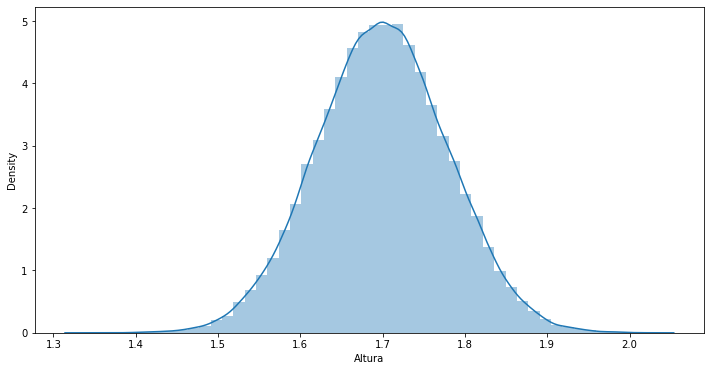

In [62]:
# AVALIANDO ALTURA
ax = sns.distplot(dados.Altura)
ax.figure.set_size_inches(12, 6)
ax

In [63]:
Mediana = dados.Altura.median()
Mediana

1.6993247325

In [64]:
Moda = dados.Altura.mode()
Moda

0    1.568128
1    1.671225
2    1.681659
3    1.692977
4    1.708163
5    1.708370
6    1.753842
7    1.779073
8    1.796462
dtype: float64

In [65]:
Media = dados.Altura.mean()
Media

1.6995124540575814

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


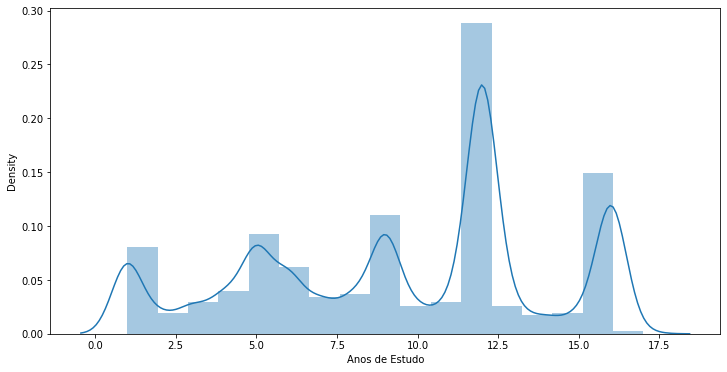

In [66]:
#Avaliando a variável ANOS DE ESTUDO
ax = sns.distplot(dados['Anos de Estudo'], bins = 17)
ax.figure.set_size_inches(12, 6)
ax

In [67]:
Moda = dados['Anos de Estudo'].mode()[0]
Moda

12

In [68]:
Mediana = dados['Anos de Estudo'].median()
Mediana

11.0

In [69]:
Media = dados['Anos de Estudo'].mean()
Media

9.469664237376367

In [70]:
Moda > Mediana > Media

True

In [71]:
# Quartis, decis e percentis
dados.Renda.quantile([0.25, 0.5, 0.75])

0.25     788.0
0.50    1200.0
0.75    2000.0
Name: Renda, dtype: float64

In [72]:
[i / 10 for i in range(1, 10)]

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [73]:
dados.Renda.quantile([i / 10 for i in range(1, 10)])

0.1     350.0
0.2     788.0
0.3     800.0
0.4    1000.0
0.5    1200.0
0.6    1500.0
0.7    1900.0
0.8    2500.0
0.9    4000.0
Name: Renda, dtype: float64

In [74]:
dados.Renda.quantile([i / 100 for i in range(1, 100)])

0.01        0.0
0.02        0.0
0.03        0.0
0.04       50.0
0.05      100.0
         ...   
0.95     6000.0
0.96     7000.0
0.97     8000.0
0.98    10000.0
0.99    15000.0
Name: Renda, Length: 99, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


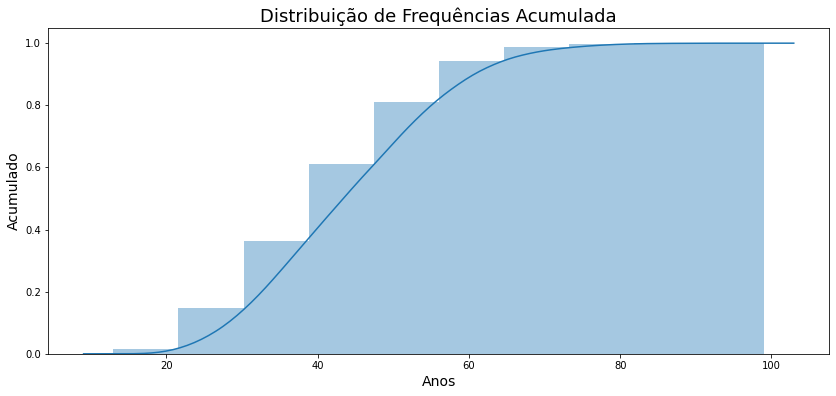

In [75]:
ax = sns.distplot(dados.Idade, 
                  hist_kws = {'cumulative': True},
                  kde_kws = {'cumulative': True},
                  bins = 10)
ax.figure.set_size_inches(14, 6)
ax.set_title('Distribuição de Frequências Acumulada', fontsize=18)
ax.set_ylabel('Acumulado', fontsize=14)
ax.set_xlabel('Anos', fontsize=14)
ax

In [76]:
dados.Idade.quantile([i / 10 for i in range(1, 10)])

0.1    28.0
0.2    33.0
0.3    36.0
0.4    40.0
0.5    43.0
0.6    47.0
0.7    51.0
0.8    55.0
0.9    61.0
Name: Idade, dtype: float64

##Box-plot

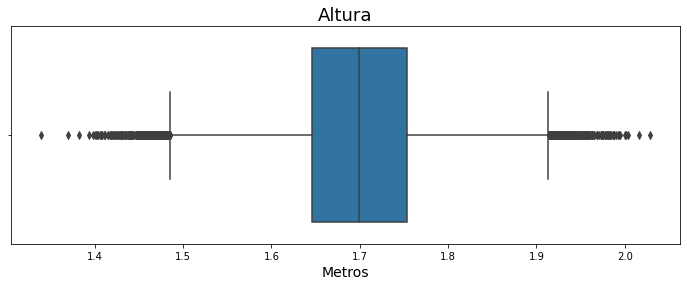

In [77]:
ax = sns.boxplot(x = 'Altura', data = dados, orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Altura', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)
ax

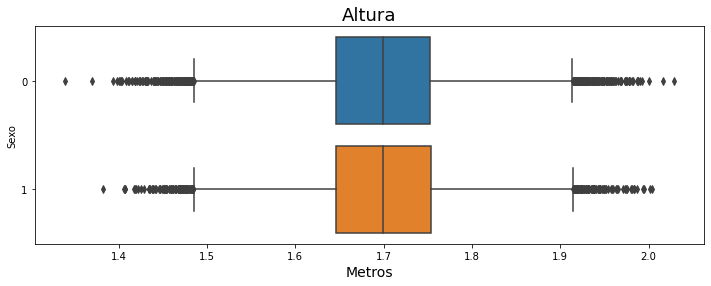

In [78]:
ax = sns.boxplot(x = 'Altura', y = 'Sexo', data = dados, orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Altura', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)
ax